<h1>After Cleaning and Feature Engineering: Modeling </h1>

- import data frames

In [2]:
import pandas as pd
import numpy as np

DATA_PATH ='./data'
df_fights = pd.read_csv(DATA_PATH+'/df_fights.csv')
df_fighter_history = pd.read_csv(DATA_PATH+'/df_fighter_history.csv')
df_fights_train = pd.read_csv(DATA_PATH+'/df_fights_train.csv')
df_fighter_history_train = pd.read_csv(DATA_PATH+'/df_fighter_history_train.csv')
df_train = pd.read_csv(DATA_PATH+'/df_train.csv')

<h4>Implement Random Forest Classifier on omniscient data (i.e. real fight stats are known prior to predicting a winner for the bout)</h4>

In [3]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# scaling not needed for tree model
X=df_train[['R_KD', 'B_KD', 'R_SIG_STR_pct',
       'B_SIG_STR_pct', 'R_TD_pct', 'B_TD_pct', 'R_SUB_ATT', 'B_SUB_ATT',
       'R_PASS', 'B_PASS', 'R_REV', 'B_REV',
       'location', 'R_SIG_STR._ATT', 'R_SIG_STR._LANDED', 'B_SIG_STR._ATT',
       'B_SIG_STR._LANDED', 'R_TOTAL_STR._ATT', 'R_TOTAL_STR._LANDED',
       'B_TOTAL_STR._ATT', 'B_TOTAL_STR._LANDED', 'R_TD_ATT', 'R_TD_LANDED',
       'B_TD_ATT', 'B_TD_LANDED', 'R_HEAD_ATT', 'R_HEAD_LANDED', 'B_HEAD_ATT',
       'B_HEAD_LANDED', 'R_BODY_ATT', 'R_BODY_LANDED', 'B_BODY_ATT',
       'B_BODY_LANDED', 'R_LEG_ATT', 'R_LEG_LANDED', 'B_LEG_ATT',
       'B_LEG_LANDED', 'R_DISTANCE_ATT', 'R_DISTANCE_LANDED', 'B_DISTANCE_ATT',
       'B_DISTANCE_LANDED', 'R_CLINCH_ATT', 'R_CLINCH_LANDED', 'B_CLINCH_ATT',
       'B_CLINCH_LANDED', 'R_GROUND_ATT', 'R_GROUND_LANDED', 'B_GROUND_ATT',
       'B_GROUND_LANDED', 'title_bout',
       'total_time_fought(sec)', 'no_of_rounds', 'R_Height',
       'R_Weight', 'R_Reach', 'R_KO_win_%', 'R_Sub_win_%', 'R_Stance_Orthodox',
       'R_Stance_Southpaw', 'R_num_fights', 'R_record', 'R_age', 'B_Height',
       'B_Weight', 'B_Reach', 'B_KO_win_%', 'B_Sub_win_%', 'B_Stance_Orthodox',
       'B_Stance_Southpaw', 'B_num_fights', 'B_record', 'B_age', 'Bantamweight', 'Featherweight',
       'Flyweight', 'Heavyweight', 'Light Heavyweight', 'Lightweight',
       'Middleweight', 'Welterweight', 'Women\'s Bantamweight',
       'Women\'s Featherweight', 'Women\'s Flyweight', 'Women\'s Strawweight']]  # Features

y=df_train['Red_win']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33) # 80% training and 20% test

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [4]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#Receiver Operating Characteristic Area-Under-Curve (0->1, where 1 is a perfect classifier))
print("AUC:", metrics.roc_auc_score(y_test, y_pred))

Accuracy: 0.8549382716049383
AUC: 0.8337496304301284


- Plot Receiver Operating Characteristic

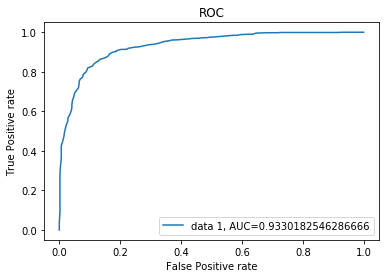

In [63]:
import matplotlib.pyplot as plt
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, AUC="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC')
plt.show()

In [64]:
feature_importance = pd.Series(clf.feature_importances_,index=['R_KD', 'B_KD', 'R_SIG_STR_pct',
       'B_SIG_STR_pct', 'R_TD_pct', 'B_TD_pct', 'R_SUB_ATT', 'B_SUB_ATT',
       'R_PASS', 'B_PASS', 'R_REV', 'B_REV',
       'location', 'R_SIG_STR._ATT', 'R_SIG_STR._LANDED', 'B_SIG_STR._ATT',
       'B_SIG_STR._LANDED', 'R_TOTAL_STR._ATT', 'R_TOTAL_STR._LANDED',
       'B_TOTAL_STR._ATT', 'B_TOTAL_STR._LANDED', 'R_TD_ATT', 'R_TD_LANDED',
       'B_TD_ATT', 'B_TD_LANDED', 'R_HEAD_ATT', 'R_HEAD_LANDED', 'B_HEAD_ATT',
       'B_HEAD_LANDED', 'R_BODY_ATT', 'R_BODY_LANDED', 'B_BODY_ATT',
       'B_BODY_LANDED', 'R_LEG_ATT', 'R_LEG_LANDED', 'B_LEG_ATT',
       'B_LEG_LANDED', 'R_DISTANCE_ATT', 'R_DISTANCE_LANDED', 'B_DISTANCE_ATT',
       'B_DISTANCE_LANDED', 'R_CLINCH_ATT', 'R_CLINCH_LANDED', 'B_CLINCH_ATT',
       'B_CLINCH_LANDED', 'R_GROUND_ATT', 'R_GROUND_LANDED', 'B_GROUND_ATT',
       'B_GROUND_LANDED', 'title_bout',
       'total_time_fought(sec)', 'no_of_rounds', 'R_Height',
       'R_Weight', 'R_Reach', 'R_KO_win_%', 'R_Sub_win_%', 'R_Stance_Orthodox',
       'R_Stance_Southpaw', 'R_num_fights', 'R_record', 'R_age', 'B_Height',
       'B_Weight', 'B_Reach', 'B_KO_win_%', 'B_Sub_win_%', 'B_Stance_Orthodox',
       'B_Stance_Southpaw', 'B_num_fights', 'B_record', 'B_age', 'Bantamweight', 'Featherweight',
       'Flyweight', 'Heavyweight', 'Light Heavyweight', 'Lightweight',
       'Middleweight', 'Welterweight', 'Women\'s Bantamweight',
       'Women\'s Featherweight', 'Women\'s Flyweight', 'Women\'s Strawweight']).sort_values(ascending=False)

In [65]:
feature_importance[feature_importance > 0.01]

B_GROUND_LANDED        0.051621
R_GROUND_ATT           0.046983
R_GROUND_LANDED        0.044292
B_KD                   0.044033
B_GROUND_ATT           0.040189
R_TOTAL_STR._LANDED    0.038131
B_HEAD_LANDED          0.035359
B_SIG_STR._LANDED      0.031653
B_SIG_STR_pct          0.031317
R_HEAD_LANDED          0.027739
R_SIG_STR._LANDED      0.025032
B_TOTAL_STR._LANDED    0.022952
B_PASS                 0.022705
R_SUB_ATT              0.020190
R_TOTAL_STR._ATT       0.019768
B_DISTANCE_LANDED      0.017491
R_TD_pct               0.017284
R_KD                   0.016931
R_SIG_STR_pct          0.016348
R_PASS                 0.015774
B_TOTAL_STR._ATT       0.015212
R_HEAD_ATT             0.015087
B_SIG_STR._ATT         0.014740
R_age                  0.014732
B_HEAD_ATT             0.014417
R_SIG_STR._ATT         0.014204
B_TD_pct               0.011714
R_DISTANCE_LANDED      0.011555
B_age                  0.011133
B_DISTANCE_ATT         0.010238
B_SUB_ATT              0.010229
R_DISTAN

<h4>Implement Random Forest Classifier only using features that WOULD BE KNOWN before a fight begins</h4>

In [66]:
X=df_train[['location','title_bout','R_Height',
       'R_Weight', 'R_Reach', 'R_KO_win_%', 'R_Sub_win_%', 'R_Stance_Orthodox',
       'R_Stance_Southpaw', 'R_num_fights', 'R_record', 'R_age', 'B_Height',
       'B_Weight', 'B_Reach', 'B_KO_win_%', 'B_Sub_win_%', 'B_Stance_Orthodox',
       'B_Stance_Southpaw', 'B_num_fights', 'B_record', 'B_age', 'Bantamweight', 'Featherweight',
       'Flyweight', 'Heavyweight', 'Light Heavyweight', 'Lightweight',
       'Middleweight', 'Welterweight', 'Women\'s Bantamweight',
       'Women\'s Featherweight', 'Women\'s Flyweight', 'Women\'s Strawweight']]  # Features

y=df_train['Red_win']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6399491094147582


In [67]:
feature_importance = pd.Series(clf.feature_importances_,index=['location','title_bout','R_Height',
       'R_Weight', 'R_Reach', 'R_KO_win_%', 'R_Sub_win_%', 'R_Stance_Orthodox',
       'R_Stance_Southpaw', 'R_num_fights', 'R_record', 'R_age', 'B_Height',
       'B_Weight', 'B_Reach', 'B_KO_win_%', 'B_Sub_win_%', 'B_Stance_Orthodox',
       'B_Stance_Southpaw', 'B_num_fights', 'B_record', 'B_age', 'Bantamweight', 'Featherweight',
       'Flyweight', 'Heavyweight', 'Light Heavyweight', 'Lightweight',
       'Middleweight', 'Welterweight', 'Women\'s Bantamweight',
       'Women\'s Featherweight', 'Women\'s Flyweight', 'Women\'s Strawweight']).sort_values(ascending=False)

feature_importance[feature_importance > 0.01]

R_age                0.102352
B_age                0.093794
R_num_fights         0.063121
R_record             0.061873
B_Reach              0.059256
R_KO_win_%           0.054162
R_Reach              0.053869
B_record             0.051224
B_num_fights         0.051196
R_Sub_win_%          0.050820
B_KO_win_%           0.048668
B_Height             0.048573
R_Height             0.046123
B_Sub_win_%          0.044223
B_Weight             0.033304
R_Weight             0.032794
location             0.011962
B_Stance_Southpaw    0.010306
B_Stance_Orthodox    0.010269
dtype: float64

- Displaying top feature importance when the current fight stats are not available   

No handles with labels found to put in legend.


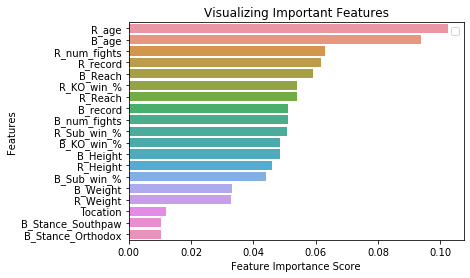

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
feature_importance_plt = feature_importance[feature_importance > 0.01]
sns.barplot(x=feature_importance_plt, y=feature_importance_plt.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

### Create df_fights_train and df_fighter_history_train dataframes with estimated stats
- will be pulling much more from df_fighter_history when calculating the estimates data frame
- creating data frame of estimated fighter stats
    - avg. from all fights
    - avg. from last 5 fights
    - values from last fight

In [51]:
df_fights_train_est = df_fights[['R_fighter', 'B_fighter','win_by', 'last_round', 'date',
       'location','title_bout', 'weight_class', 
       'Red_win']]

#3 fights look-back appears to have the highest accuract and precision scores
past_fights_to_average = 10


df_fighter_history_train_est = df_fighter_history[['fighter_name', 'Height', 
                            'Weight', 'Reach', 'Stance', 'DOB', 'win_by',
                            'date','win',
       'KD','SIG_STR_pct', 'TD_pct', 'SUB_ATT', 'PASS', 'REV', 'SIG_STR._ATT',
       'SIG_STR._LANDED', 'TOTAL_STR._ATT', 'TOTAL_STR._LANDED', 'TD_ATT',
       'TD_LANDED', 'HEAD_ATT', 'HEAD_LANDED', 'BODY_ATT', 'BODY_LANDED',
       'LEG_ATT', 'LEG_LANDED', 'DISTANCE_ATT', 'DISTANCE_LANDED',
       'CLINCH_ATT', 'CLINCH_LANDED', 'GROUND_ATT', 'GROUND_LANDED',
       'total_time_fought(sec)', 'no_of_rounds']]


# first merge for red fighter estimates
df_train_est = pd.merge(df_fights_train_est, df_fighter_history_train_est, left_on='R_fighter',right_on='fighter_name',sort=False)


df_train_est = df_train_est[df_train_est['date_x'] > df_train_est['date_y']]


df_train_est = pd.concat([df_train_est, pd.get_dummies(df_train_est['win_by_y'])], axis=1)
df_train_est.drop(columns=['win_by_y','Other'], inplace=True)
df_train_est.rename(columns={'date_x':'date', 'KO':'KO_win_%', 'Submission':'Sub_win_%'}, inplace=True)


df_train_est = pd.concat([df_train_est, pd.get_dummies(df_train_est['Stance'])], axis=1)
df_train_est.drop(columns=['Stance','Switch','Open Stance','Sideways'], inplace=True)
df_train_est.rename(columns={'Orthodox':'R_Stance_Orthodox', 
                         'Southpaw':'R_Stance_Southpaw',
                         'Height':'R_Height',
                         'Weight':'R_Weight',
                         'Reach':'R_Reach'}, inplace=True)


df_train_est['date_y']= pd.to_datetime(df_train_est['date_y'])
df_train_est['date']= pd.to_datetime(df_train_est['date']) 
df_train_est['DOB']= pd.to_datetime(df_train_est['DOB']) 


df_train_est['R_num_fights'] = df_train_est.groupby(['R_fighter','date'])['date'].transform('count')

df_train_est['R_num_wins'] = df_train_est.groupby(['R_fighter','date'])['win'].transform('sum')

df_train_est['R_record'] = df_train_est['R_num_wins']/df_train_est['R_num_fights']

df_train_est['fight_rank'] = df_train_est.groupby(['R_fighter','date'])['date_y'].rank(ascending=False, method='first')

df_train_est = df_train_est[df_train_est['fight_rank']<=past_fights_to_average]

df_train_est.drop(columns=['win','R_num_wins','date_y','fighter_name','fight_rank'], inplace=True)


df_train_est['R_age'] = df_train_est['date'] - df_train_est['DOB']
df_train_est['R_age'] = df_train_est['R_age']/np.timedelta64(1,'Y')
df_train_est['R_age'].fillna(df_train_est['R_age'].mean(), inplace=True)

df_train_est.drop(columns=['DOB'], inplace=True)


est_columns = ['KD', 'SIG_STR_pct', 'TD_pct', 'SUB_ATT', 'PASS', 'REV',
       'SIG_STR._ATT', 'SIG_STR._LANDED', 'TOTAL_STR._ATT',
       'TOTAL_STR._LANDED', 'TD_ATT', 'TD_LANDED', 'HEAD_ATT', 'HEAD_LANDED',
       'BODY_ATT', 'BODY_LANDED', 'LEG_ATT', 'LEG_LANDED', 'DISTANCE_ATT',
       'DISTANCE_LANDED', 'CLINCH_ATT', 'CLINCH_LANDED', 'GROUND_ATT',
       'GROUND_LANDED', 'total_time_fought(sec)', 'no_of_rounds', 'KO_win_%',
       'Sub_win_%']


df_train_est[est_columns] = df_train_est.groupby(['R_fighter', 'B_fighter', 'win_by_x', 'last_round', 'date', 'location',
       'title_bout', 'weight_class', 'Red_win', 'R_Height', 'R_Weight',
       'R_Reach', 'R_Stance_Orthodox', 'R_Stance_Southpaw', 'R_num_fights',
       'R_record', 'R_age'])[est_columns].transform('mean')

df_train_est = df_train_est.drop_duplicates()

df_train_est.rename(columns={'KD':'R_KD',                        
                             'SIG_STR_pct':'R_SIG_STR_pct',
                             'TD_pct':'R_TD_pct',
                             'SUB_ATT':'R_SUB_ATT',
                             'PASS':'R_PASS',
                             'REV':'R_REV',
                           'SIG_STR._ATT':'R_SIG_STR._ATT',
                             'SIG_STR._LANDED':'R_SIG_STR._LANDED',
                             'TOTAL_STR._ATT':'R_TOTAL_STR._ATT',
                           'TOTAL_STR._LANDED':'R_TOTAL_STR._LANDED',
                             'TD_ATT':'R_TD_ATT',
                             'TD_LANDED':'R_TD_LANDED',
                             'HEAD_ATT':'R_HEAD_ATT',
                             'HEAD_LANDED':'R_HEAD_LANDED',
                           'BODY_ATT':'R_BODY_ATT',
                             'BODY_LANDED':'R_BODY_LANDED',
                             'LEG_ATT':'R_LEG_ATT',
                             'LEG_LANDED':'R_LEG_LANDED',
                             'DISTANCE_ATT':'R_DISTANCE_ATT',
                           'DISTANCE_LANDED':'R_DISTANCE_LANDED',
                             'CLINCH_ATT':'R_CLINCH_ATT',
                             'CLINCH_LANDED':'R_CLINCH_LANDED', 
                             'GROUND_ATT':'R_GROUND_ATT',
                           'GROUND_LANDED':'R_GROUND_LANDED',
                             'total_time_fought(sec)':'R_total_time_fought(sec)',
                             'no_of_rounds':'R_no_of_rounds',
                             'KO_win_%':'R_KO_win_%',
                           'Sub_win_%':'R_Sub_win_%'}, inplace=True)


# repeat steps for blue fighter
df_train_est = pd.merge(df_train_est, df_fighter_history_train_est, left_on='B_fighter',right_on='fighter_name',sort=False)

df_train_est['date_y']= pd.to_datetime(df_train_est['date_y'])
df_train_est['date_x']= pd.to_datetime(df_train_est['date_x']) 
df_train_est['DOB']= pd.to_datetime(df_train_est['DOB']) 

df_train_est = df_train_est[df_train_est['date_x'] > df_train_est['date_y']]


df_train_est = pd.concat([df_train_est, pd.get_dummies(df_train_est['win_by'])], axis=1)
df_train_est.drop(columns=['win_by','Other'], inplace=True)
df_train_est.rename(columns={'date_x':'date', 'KO':'KO_win_%', 'Submission':'Sub_win_%'}, inplace=True)

df_train_est = pd.concat([df_train_est, pd.get_dummies(df_train_est['Stance'])], axis=1)
df_train_est.drop(columns=['Stance','Switch','Open Stance','Sideways'], inplace=True)
df_train_est.rename(columns={'Orthodox':'B_Stance_Orthodox', 
                         'Southpaw':'B_Stance_Southpaw',
                         'Height':'B_Height',
                         'Weight':'B_Weight',
                         'Reach':'B_Reach'}, inplace=True)


df_train_est['B_num_fights'] = df_train_est.groupby(['B_fighter','date'])['date'].transform('count')

df_train_est['B_num_wins'] = df_train_est.groupby(['B_fighter','date'])['win'].transform('sum')

df_train_est['B_record'] = df_train_est['B_num_wins']/df_train_est['B_num_fights']

df_train_est['fight_rank'] = df_train_est.groupby(['B_fighter','date'])['date_y'].rank(ascending=False, method='first')

df_train_est = df_train_est[df_train_est['fight_rank']<=past_fights_to_average]

df_train_est.drop(columns=['win','B_num_wins','date_y','fighter_name','fight_rank'], inplace=True)


df_train_est['B_age'] = df_train_est['date'] - df_train_est['DOB']
df_train_est['B_age'] = df_train_est['B_age']/np.timedelta64(1,'Y')
df_train_est['B_age'].fillna(df_train_est['B_age'].mean(), inplace=True)

df_train_est.drop(columns=['DOB'], inplace=True)


est_columns = ['KD', 'SIG_STR_pct', 'TD_pct', 'SUB_ATT', 'PASS', 'REV',
       'SIG_STR._ATT', 'SIG_STR._LANDED', 'TOTAL_STR._ATT',
       'TOTAL_STR._LANDED', 'TD_ATT', 'TD_LANDED', 'HEAD_ATT', 'HEAD_LANDED',
       'BODY_ATT', 'BODY_LANDED', 'LEG_ATT', 'LEG_LANDED', 'DISTANCE_ATT',
       'DISTANCE_LANDED', 'CLINCH_ATT', 'CLINCH_LANDED', 'GROUND_ATT',
       'GROUND_LANDED', 'total_time_fought(sec)', 'no_of_rounds', 'KO_win_%',
       'Sub_win_%']



df_train_est[est_columns] = df_train_est.groupby(['R_fighter', 'B_fighter', 'win_by_x', 'last_round', 'date', 'location',
       'title_bout', 'weight_class', 'Red_win', 'B_Height', 'B_Weight',
       'B_Reach', 'B_Stance_Orthodox', 'B_Stance_Southpaw', 'B_num_fights',
       'B_record', 'B_age'])[est_columns].transform('mean')

df_train_est = df_train_est.drop_duplicates()

df_train_est.rename(columns={'KD':'B_KD',                        
                             'SIG_STR_pct':'B_SIG_STR_pct',
                             'TD_pct':'B_TD_pct',
                             'SUB_ATT':'B_SUB_ATT',
                             'PASS':'B_PASS',
                             'REV':'B_REV',
                           'SIG_STR._ATT':'B_SIG_STR._ATT',
                             'SIG_STR._LANDED':'B_SIG_STR._LANDED',
                             'TOTAL_STR._ATT':'B_TOTAL_STR._ATT',
                           'TOTAL_STR._LANDED':'B_TOTAL_STR._LANDED',
                             'TD_ATT':'B_TD_ATT',
                             'TD_LANDED':'B_TD_LANDED',
                             'HEAD_ATT':'B_HEAD_ATT',
                             'HEAD_LANDED':'B_HEAD_LANDED',
                           'BODY_ATT':'B_BODY_ATT',
                             'BODY_LANDED':'B_BODY_LANDED',
                             'LEG_ATT':'B_LEG_ATT',
                             'LEG_LANDED':'B_LEG_LANDED',
                             'DISTANCE_ATT':'B_DISTANCE_ATT',
                           'DISTANCE_LANDED':'B_DISTANCE_LANDED',
                             'CLINCH_ATT':'B_CLINCH_ATT',
                             'CLINCH_LANDED':'B_CLINCH_LANDED', 
                             'GROUND_ATT':'B_GROUND_ATT',
                           'GROUND_LANDED':'B_GROUND_LANDED',
                             'total_time_fought(sec)':'B_total_time_fought(sec)',
                             'no_of_rounds':'B_no_of_rounds',
                             'KO_win_%':'B_KO_win_%',
                           'Sub_win_%':'B_Sub_win_%'}, inplace=True)


df_train_est = pd.concat([df_train_est, pd.get_dummies(df_train_est['weight_class'])], axis=1)
df_train_est.drop(columns=['weight_class','Open Weight','Catch Weight'], inplace=True)
df_train_est.drop(columns=['win_by_x','last_round'], inplace=True)

- find optimal hyperparameters for classifier
    - don't run Grid Search again; it takes ~30 min

In [28]:
from sklearn.model_selection import GridSearchCV

n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyper_opt = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(clf, hyper_opt, cv = 3, verbose = 1, 
                      n_jobs = -1)

#bestF = gridF.fit(X_train, y_train)

bestF

- Optimal Random Forest Classifier (after hyperparamter tuning)

In [75]:
forestOpt = RandomForestClassifier(bootstrap=True,
                                              class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              #max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False)
                                   
modelOpt = forestOpt.fit(X_train, y_train)
y_pred = modelOpt.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))  #when we pred a winner, how often were we right?
print("Precision:",metrics.precision_score(y_test, y_pred)) #what % of our winner preds were right
print("Recall:",metrics.recall_score(y_test, y_pred)) #what % of winners did we detect
print("F1:",metrics.f1_score(y_test, y_pred)) #harmonic mean of precision and recall
print("AUC:", metrics.roc_auc_score(y_test, y_pred)) #area under ROC curve

Accuracy: 0.6450381679389313
Precision: 0.6750369276218612
Recall: 0.8856589147286822
F1: 0.7661357921207042
AUC: 0.5354220499569338


- Receiver Operating Characteristic

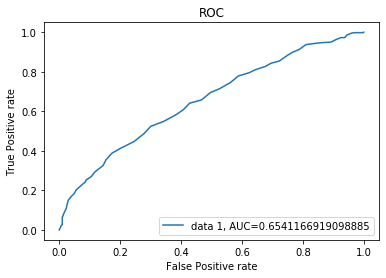

In [31]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, AUC="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC')
plt.show()

In [88]:
feature_importance = pd.Series(clf.feature_importances_,index=['location', 'title_bout',
       'R_Height', 'R_Weight', 'R_Reach', 'R_KD', 'R_SIG_STR_pct', 'R_TD_pct',
       'R_SUB_ATT', 'R_PASS', 'R_REV', 'R_SIG_STR._ATT', 'R_SIG_STR._LANDED',
       'R_TOTAL_STR._ATT', 'R_TOTAL_STR._LANDED', 'R_TD_ATT', 'R_TD_LANDED',
       'R_HEAD_ATT', 'R_HEAD_LANDED', 'R_BODY_ATT', 'R_BODY_LANDED',
       'R_LEG_ATT', 'R_LEG_LANDED', 'R_DISTANCE_ATT', 'R_DISTANCE_LANDED',
       'R_CLINCH_ATT', 'R_CLINCH_LANDED', 'R_GROUND_ATT', 'R_GROUND_LANDED',
       'R_total_time_fought(sec)', 'R_no_of_rounds', 'R_KO_win_%',
       'R_Sub_win_%', 'R_Stance_Orthodox', 'R_Stance_Southpaw', 'R_num_fights',
       'R_record', 'R_age', 'B_Height', 'B_Weight', 'B_Reach', 'B_KD',
       'B_SIG_STR_pct', 'B_TD_pct', 'B_SUB_ATT', 'B_PASS', 'B_REV',
       'B_SIG_STR._ATT', 'B_SIG_STR._LANDED', 'B_TOTAL_STR._ATT',
       'B_TOTAL_STR._LANDED', 'B_TD_ATT', 'B_TD_LANDED', 'B_HEAD_ATT',
       'B_HEAD_LANDED', 'B_BODY_ATT', 'B_BODY_LANDED', 'B_LEG_ATT',
       'B_LEG_LANDED', 'B_DISTANCE_ATT', 'B_DISTANCE_LANDED', 'B_CLINCH_ATT',
       'B_CLINCH_LANDED', 'B_GROUND_ATT', 'B_GROUND_LANDED',
       'B_total_time_fought(sec)', 'B_no_of_rounds', 'B_KO_win_%',
       'B_Sub_win_%', 'B_Stance_Orthodox', 'B_Stance_Southpaw', 'B_num_fights',
       'B_record', 'B_age', 'Bantamweight', 'Featherweight', 'Flyweight',
       'Heavyweight', 'Light Heavyweight', 'Lightweight', 'Middleweight',
       'Welterweight', 'Women\'s Bantamweight', 'Women\'s Featherweight',
       'Women\'s Flyweight', 'Women\'s Strawweight']).sort_values(ascending=False)

feature_importance[feature_importance > 0.016]

R_age                       0.025785
B_age                       0.024965
R_GROUND_ATT                0.020569
B_HEAD_LANDED               0.019646
B_HEAD_ATT                  0.019430
B_DISTANCE_LANDED           0.019242
B_DISTANCE_ATT              0.019165
R_TD_pct                    0.018869
R_DISTANCE_ATT              0.018786
R_BODY_ATT                  0.018739
R_GROUND_LANDED             0.018133
B_TOTAL_STR._ATT            0.017793
R_DISTANCE_LANDED           0.017754
R_BODY_LANDED               0.017745
B_SIG_STR._ATT              0.017561
R_SIG_STR_pct               0.017393
B_BODY_ATT                  0.017307
R_total_time_fought(sec)    0.017288
R_TOTAL_STR._LANDED         0.017118
R_TOTAL_STR._ATT            0.017005
B_TOTAL_STR._LANDED         0.016954
R_HEAD_ATT                  0.016691
B_LEG_ATT                   0.016537
B_SIG_STR_pct               0.016513
B_TD_ATT                    0.016358
R_CLINCH_ATT                0.016356
B_CLINCH_LANDED             0.016325
R

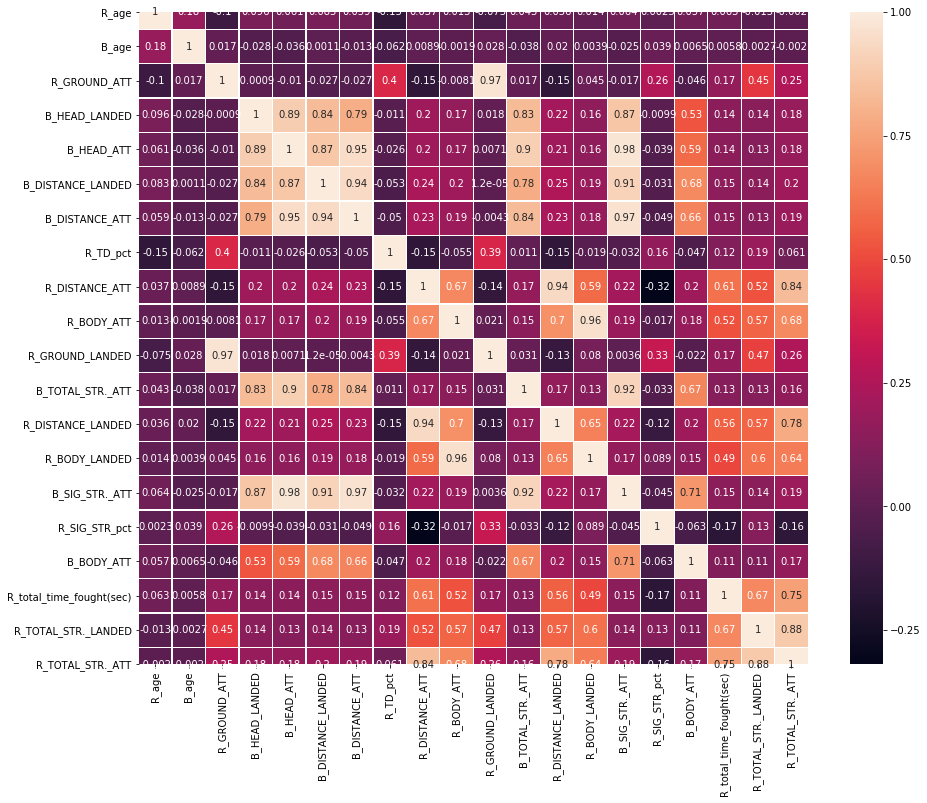

In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_hist = df_train_est[['location', 'title_bout',
       'R_Height', 'R_Weight', 'R_Reach', 'R_KD', 'R_SIG_STR_pct', 'R_TD_pct',
       'R_SUB_ATT', 'R_PASS', 'R_REV', 'R_SIG_STR._ATT', 'R_SIG_STR._LANDED',
       'R_TOTAL_STR._ATT', 'R_TOTAL_STR._LANDED', 'R_TD_ATT', 'R_TD_LANDED',
       'R_HEAD_ATT', 'R_HEAD_LANDED', 'R_BODY_ATT', 'R_BODY_LANDED',
       'R_LEG_ATT', 'R_LEG_LANDED', 'R_DISTANCE_ATT', 'R_DISTANCE_LANDED',
       'R_CLINCH_ATT', 'R_CLINCH_LANDED', 'R_GROUND_ATT', 'R_GROUND_LANDED',
       'R_total_time_fought(sec)', 'R_no_of_rounds', 'R_KO_win_%',
       'R_Sub_win_%', 'R_Stance_Orthodox', 'R_Stance_Southpaw', 'R_num_fights',
       'R_record', 'R_age', 'B_Height', 'B_Weight', 'B_Reach', 'B_KD',
       'B_SIG_STR_pct', 'B_TD_pct', 'B_SUB_ATT', 'B_PASS', 'B_REV',
       'B_SIG_STR._ATT', 'B_SIG_STR._LANDED', 'B_TOTAL_STR._ATT',
       'B_TOTAL_STR._LANDED', 'B_TD_ATT', 'B_TD_LANDED', 'B_HEAD_ATT',
       'B_HEAD_LANDED', 'B_BODY_ATT', 'B_BODY_LANDED', 'B_LEG_ATT',
       'B_LEG_LANDED', 'B_DISTANCE_ATT', 'B_DISTANCE_LANDED', 'B_CLINCH_ATT',
       'B_CLINCH_LANDED', 'B_GROUND_ATT', 'B_GROUND_LANDED',
       'B_total_time_fought(sec)', 'B_no_of_rounds', 'B_KO_win_%',
       'B_Sub_win_%', 'B_Stance_Orthodox', 'B_Stance_Southpaw', 'B_num_fights',
       'B_record', 'B_age', 'Bantamweight', 'Featherweight', 'Flyweight',
       'Heavyweight', 'Light Heavyweight', 'Lightweight', 'Middleweight',
       'Welterweight', 'Women\'s Bantamweight', 'Women\'s Featherweight',
       'Women\'s Flyweight', 'Women\'s Strawweight']]

fig, ax = plt.subplots(figsize=(15,12))         # Sample figsize in inches
corrMatrix = df_hist[feature_importance[feature_importance > 0.017].index].corr()
sns.heatmap(corrMatrix, annot=True, linewidths=.2, ax=ax)

<h4>Implement support vector classifier</h4>

In [74]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

X=df_train_est[['location', 'title_bout',
       'R_Height', 'R_Weight', 'R_Reach', 'R_KD', 'R_SIG_STR_pct', 'R_TD_pct',
       'R_SUB_ATT', 'R_PASS', 'R_REV', 'R_SIG_STR._ATT', 'R_SIG_STR._LANDED',
       'R_TOTAL_STR._ATT', 'R_TOTAL_STR._LANDED', 'R_TD_ATT', 'R_TD_LANDED',
       'R_HEAD_ATT', 'R_HEAD_LANDED', 'R_BODY_ATT', 'R_BODY_LANDED',
       'R_LEG_ATT', 'R_LEG_LANDED', 'R_DISTANCE_ATT', 'R_DISTANCE_LANDED',
       'R_CLINCH_ATT', 'R_CLINCH_LANDED', 'R_GROUND_ATT', 'R_GROUND_LANDED',
       'R_total_time_fought(sec)', 'R_no_of_rounds', 'R_KO_win_%',
       'R_Sub_win_%', 'R_Stance_Orthodox', 'R_Stance_Southpaw', 'R_num_fights',
       'R_record', 'R_age', 'B_Height', 'B_Weight', 'B_Reach', 'B_KD',
       'B_SIG_STR_pct', 'B_TD_pct', 'B_SUB_ATT', 'B_PASS', 'B_REV',
       'B_SIG_STR._ATT', 'B_SIG_STR._LANDED', 'B_TOTAL_STR._ATT',
       'B_TOTAL_STR._LANDED', 'B_TD_ATT', 'B_TD_LANDED', 'B_HEAD_ATT',
       'B_HEAD_LANDED', 'B_BODY_ATT', 'B_BODY_LANDED', 'B_LEG_ATT',
       'B_LEG_LANDED', 'B_DISTANCE_ATT', 'B_DISTANCE_LANDED', 'B_CLINCH_ATT',
       'B_CLINCH_LANDED', 'B_GROUND_ATT', 'B_GROUND_LANDED',
       'B_total_time_fought(sec)', 'B_no_of_rounds', 'B_KO_win_%',
       'B_Sub_win_%', 'B_Stance_Orthodox', 'B_Stance_Southpaw', 'B_num_fights',
       'B_record', 'B_age', 'Bantamweight', 'Featherweight', 'Flyweight',
       'Heavyweight', 'Light Heavyweight', 'Lightweight', 'Middleweight',
       'Welterweight', 'Women\'s Bantamweight', 'Women\'s Featherweight',
       'Women\'s Flyweight', 'Women\'s Strawweight']]  # Features

y=df_train_est['Red_win']  # Labels

#X, y = make_classification(n_features=4, random_state=0)
clf = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5))
clf.fit(X, y)


predicted_classes = clf.predict(X)
accuracy = metrics.accuracy_score(y.values.flatten(),predicted_classes)
#parameters = clf.coef_

print("Accuracy:",metrics.accuracy_score(y.values.flatten(), predicted_classes))  #when we pred a winner, how often were we right?
print("Precision:",metrics.precision_score(y.values.flatten(), predicted_classes)) #what % of our winner preds were right
print("Recall:",metrics.recall_score(y.values.flatten(), predicted_classes)) #what % of winners did we detect
print("AUC:", metrics.roc_auc_score(y.values.flatten(), predicted_classes)) #area under ROC curve

Accuracy: 0.6753246753246753
Precision: 0.6962893670096664
Recall: 0.8812154696132597
AUC: 0.5910025661059838


C:\Users\emag3\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Implement Support Vector Machine Classifier (THIS IS OUR GUY)

In [73]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn import metrics

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf.fit(X_train, y_train) #NOTE: no test/train split


predicted_classes = clf.predict(X_test)
#accuracy = metrics.accuracy_score(y.values.flatten(),predicted_classes)


print("Accuracy:",metrics.accuracy_score(y_test, predicted_classes))  #when we pred a winner, how often were we right?
print("Precision:",metrics.precision_score(y_test, predicted_classes)) #what % of our winner preds were right
print("Recall:",metrics.recall_score(y_test, predicted_classes)) #what % of winners did we detect
print("F1:",metrics.f1_score(y_test, y_pred)) #harmonic mean of precision and recall
print("AUC:", metrics.roc_auc_score(y_test, predicted_classes)) #area under ROC curve

Accuracy: 0.6768447837150128
Precision: 0.6898550724637681
Recall: 0.9224806201550387
F1: 0.739817123857024
AUC: 0.564944013781223


In [76]:
import pandas as pd
import numpy as np

DATA_PATH ='./data'
df_future_bouts = pd.read_csv(DATA_PATH+'/upcoming_fight_data.csv', sep=';')

In [77]:
df_future_bouts

,R_fighter,B_fighter,Format,date,location
0,Curtis Blaydes,Alexander Volkov,Heavyweight Bout,"June 20, 2020","Las Vegas, Nevada, USA"
1,Josh Emmett,Shane Burgos,Featherweight Bout,"June 20, 2020","Las Vegas, Nevada, USA"
2,Raquel Pennington,Marion Reneau,Women's Bantamweight Bout,"June 20, 2020","Las Vegas, Nevada, USA"
3,Belal Muhammad,Lyman Good,Welterweight Bout,"June 20, 2020","Las Vegas, Nevada, USA"
4,Jim Miller,Roosevelt Roberts,Catch Weight Bout,"June 20, 2020","Las Vegas, Nevada, USA"
5,Clay Guida,Bobby Green,Lightweight Bout,"June 20, 2020","Las Vegas, Nevada, USA"
6,Tecia Torres,Brianna Van Buren,Women's Strawweight Bout,"June 20, 2020","Las Vegas, Nevada, USA"
7,Marc-Andre Barriault,Oskar Piechota,Middleweight Bout,"June 20, 2020","Las Vegas, Nevada, USA"
8,Cortney Casey,Gillian Robertson,Women's Flyweight Bout,"June 20, 2020","Las Vegas, Nevada, USA"
9,Matt Frevola,Frank Camacho,Lightweight Bout,"June 20, 2020","Las Vegas, Nevada, USA"


In [45]:
y.value_counts()

1    2532
0    1393
Name: Red_win, dtype: int64

In [72]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
#clf.fit(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))  #when we pred a winner, how often were we right?
print("Precision:",metrics.precision_score(y_test, y_pred)) #what % of our winner preds were right
print("Recall:",metrics.recall_score(y_test, y_pred)) #what % of winners did we detect
print("F1:",metrics.f1_score(y_test, y_pred)) #harmonic mean of precision and recall
print("AUC:", metrics.roc_auc_score(y_test, y_pred)) #area under ROC curve

Accuracy: 0.6666666666666666
Precision: 0.6855895196506551
Recall: 0.9110251450676983
F1: 0.782392026578073
AUC: 0.5540255836862655


# NEW CANDIDATE: LINEAR SVM

In [71]:
from sklearn.preprocessing import StandardScaler

X=df_train_est[['location', 'title_bout',
       'R_Height', 'R_Weight', 'R_Reach', 'R_KD', 'R_SIG_STR_pct', 'R_TD_pct',
       'R_SUB_ATT', 'R_PASS', 'R_REV', 'R_SIG_STR._ATT', 'R_SIG_STR._LANDED',
       'R_TOTAL_STR._ATT', 'R_TOTAL_STR._LANDED', 'R_TD_ATT', 'R_TD_LANDED',
       'R_HEAD_ATT', 'R_HEAD_LANDED', 'R_BODY_ATT', 'R_BODY_LANDED',
       'R_LEG_ATT', 'R_LEG_LANDED', 'R_DISTANCE_ATT', 'R_DISTANCE_LANDED',
       'R_CLINCH_ATT', 'R_CLINCH_LANDED', 'R_GROUND_ATT', 'R_GROUND_LANDED',
       'R_total_time_fought(sec)', 'R_no_of_rounds', 'R_KO_win_%',
       'R_Sub_win_%', 'R_Stance_Orthodox', 'R_Stance_Southpaw', 'R_num_fights',
       'R_record', 'R_age', 'B_Height', 'B_Weight', 'B_Reach', 'B_KD',
       'B_SIG_STR_pct', 'B_TD_pct', 'B_SUB_ATT', 'B_PASS', 'B_REV',
       'B_SIG_STR._ATT', 'B_SIG_STR._LANDED', 'B_TOTAL_STR._ATT',
       'B_TOTAL_STR._LANDED', 'B_TD_ATT', 'B_TD_LANDED', 'B_HEAD_ATT',
       'B_HEAD_LANDED', 'B_BODY_ATT', 'B_BODY_LANDED', 'B_LEG_ATT',
       'B_LEG_LANDED', 'B_DISTANCE_ATT', 'B_DISTANCE_LANDED', 'B_CLINCH_ATT',
       'B_CLINCH_LANDED', 'B_GROUND_ATT', 'B_GROUND_LANDED',
       'B_total_time_fought(sec)', 'B_no_of_rounds', 'B_KO_win_%',
       'B_Sub_win_%', 'B_Stance_Orthodox', 'B_Stance_Southpaw', 'B_num_fights',
       'B_record', 'B_age', 'Bantamweight', 'Featherweight', 'Flyweight',
       'Heavyweight', 'Light Heavyweight', 'Lightweight', 'Middleweight',
       'Welterweight', 'Women\'s Bantamweight', 'Women\'s Featherweight',
       'Women\'s Flyweight', 'Women\'s Strawweight']]  # Features

y=df_train_est['Red_win']  # Labels

X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))  #when we pred a winner, how often were we right?
print("Precision:",metrics.precision_score(y_test, y_pred)) #what % of our winner preds were right
print("Recall:",metrics.recall_score(y_test, y_pred)) #what % of winners did we detect
print("F1:",metrics.f1_score(y_test, y_pred)) #harmonic mean of precision and recall
print("AUC:", metrics.roc_auc_score(y_test, y_pred)) #area under ROC curve

Accuracy: 0.6170483460559797
Precision: 0.632088520055325
Recall: 0.9288617886178862
F1: 0.7522633744855968
AUC: 0.5120499419279907


In [68]:
#Import sklearn's feature selection algorithm 
from sklearn.feature_selection import RFE

#model = LogisticRegression() 

rfe = RFE(clf, 3)

fit = rfe.fit(X, y)

print("Num Features: %d"% fit.n_features_)
print("Selected Features: %s"% fit.support_)
print("Feature Ranking: %s"% fit.ranking_)

Num Features: 3
Selected Features: [False False False False False False False False False False False  True
 False  True  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False]
Feature Ranking: [74 46 27 76 26 65 84 22 50 72 45  1  2  1  1 35 83 17  7 71  8 23  9  3
  4  6 19  5 12 61 79 52 41 73 42 36 31 13 47 48 25 53 77 34 68 82 80 24
 59 14 55 20 33 28 15 18 81 11 10 29 75 30 56 78 54 58 60 67 70 32 51 66
 69 16 39 38 44 57 64 43 63 40 21 49 62 37]


- PCA for SVM

In [61]:
from sklearn.decomposition import PCA
pca = PCA(n_components=12)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

pca.explained_variance_ratio_

array([0.16113422, 0.08983192, 0.06998361, 0.05990566, 0.04209177,
       0.02794761, 0.02609525, 0.02420075, 0.02335961, 0.02106405,
       0.02056108, 0.01897367])

In [62]:
#run model with principal components

In [63]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train_pca, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test_pca)


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))  #when we pred a winner, how often were we right?
print("Precision:",metrics.precision_score(y_test, y_pred)) #what % of our winner preds were right
print("Recall:",metrics.recall_score(y_test, y_pred)) #what % of winners did we detect
print("AUC:", metrics.roc_auc_score(y_test, y_pred)) #area under ROC curve

Accuracy: 0.6399491094147582
Precision: 0.6399491094147582
Recall: 1.0
AUC: 0.5


In [64]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, AUC="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC')
plt.show()

AttributeError: predict_proba is not available when  probability=False